In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Libraries 


To start, I am going to upload some libraries that are necessary for this porject

In [2]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
from keras.regularizers import l2
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import tensorflow as tf

# 2. Neural Network Architecture

In [3]:
inputs = ks.Input(shape=(32, 32, 3))

In [4]:
upscale = ks.layers.Lambda(lambda x: tf.image.resize_with_pad(x, 224,224, method=tf.image.ResizeMethod.BILINEAR))(inputs)

In [5]:
ResNet152V2 = ks.applications.ResNet152V2(include_top=False, weights='imagenet', input_tensor=upscale, input_shape=(224,224,3), pooling='max')

234553344/234545216 [==============================] - 2s 0us/step


In [6]:
ResNet152V2.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
________________________________________________________________________________________

In [7]:
new_output_layer = ks.layers.Flatten()(ResNet152V2.layers[-1].output)
ResNet152V2= Model(ResNet152V2.input, new_output_layer)

In [8]:
ResNet152V2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

In [9]:
print("Is model trainable?", ResNet152V2.trainable)

Is model trainable? True


In [10]:
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in ResNet152V2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f66f9da1110>,input_1,True
1,<tensorflow.python.keras.layers.core.Lambda object at 0x7f66f8e71990>,lambda,True
2,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f66f8e3a850>,conv1_pad,True
3,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f66f8dd3e50>,conv1_conv,True
4,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f66f8df0590>,pool1_pad,True
...,...,...,...
562,<tensorflow.python.keras.layers.merge.Add object at 0x7f668a87e390>,conv5_block3_out,True
563,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f668aa30090>,post_bn,True
564,<tensorflow.python.keras.layers.core.Activation object at 0x7f668a87e6d0>,post_relu,True
565,<tensorflow.python.keras.layers.pooling.GlobalMaxPooling2D object at 0x7f668a884b90>,max_pool,True


In [11]:
entrenable = False

for layer in ResNet152V2.layers [:400]:
  layer.trainable = entrenable

In [12]:
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in ResNet152V2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f66f9da1110>,input_1,False
1,<tensorflow.python.keras.layers.core.Lambda object at 0x7f66f8e71990>,lambda,False
2,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f66f8e3a850>,conv1_pad,False
3,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f66f8dd3e50>,conv1_conv,False
4,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f66f8df0590>,pool1_pad,False
...,...,...,...
562,<tensorflow.python.keras.layers.merge.Add object at 0x7f668a87e390>,conv5_block3_out,True
563,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f668aa30090>,post_bn,True
564,<tensorflow.python.keras.layers.core.Activation object at 0x7f668a87e6d0>,post_relu,True
565,<tensorflow.python.keras.layers.pooling.GlobalMaxPooling2D object at 0x7f668a884b90>,max_pool,True


In [13]:
model= ks.Sequential()

model.add(ResNet152V2)

model.add(ks.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.7))
model.add(ks.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.7))
model.add(ks.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.3))
model.add(ks.layers.Dense(10, activation='softmax'))


In [14]:
# model = ks.Sequential()

# model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
#                            padding='same', kernel_initializer='he_uniform',input_shape=(32,32,3))) #convolution layer
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
#                            padding='same',  kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.MaxPooling2D((2, 2))) #Calculate the maximum value for each patch of the feature map.
# model.add(ks.layers.Dropout(0.25)) #dropout to decrease overfitting

# model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', 
#                            padding='same',  kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', 
#                            padding='same',  kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.MaxPooling2D((2, 2)))
# model.add(ks.layers.Dropout(0.5))

# model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', 
#                            padding='same',kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', 
#                            padding='same',kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.MaxPooling2D((2, 2)))
# model.add(ks.layers.Dropout(0.25))

# model.add(ks.layers.Flatten())
# model.add(ks.layers.Dense(512, activation='relu',kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Dropout(0.6))
# model.add(ks.layers.Dense(512, activation='relu',kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Dropout(0.6))
# model.add(ks.layers.Dense(512, activation='relu',kernel_initializer='he_uniform'))
# model.add(ks.layers.LeakyReLU(0.1))
# model.add(ks.layers.BatchNormalization())
# model.add(ks.layers.Dropout(0.6))
# model.add(ks.layers.Dense(10, activation='softmax',kernel_initializer='he_uniform'))

Checking the model with **.sumary()** function


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 2048)              58331648  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

# 3. Optimizer, error function

In [16]:
new_adam = Adam(lr=0.0003, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=new_adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4.Data Preparation 

Upload CIFAR-10 datasets. **Important:** neural network requires real numbers as inputs. So I will divide x_train and x_test by 255. 

In [17]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 4s 0us/step


In [18]:
y_train_label = y_train

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

CIFAR 10: Label array

In [19]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks like we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **.Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


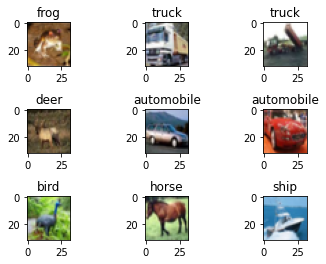

In [20]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [21]:
x_val = x_train[-10000:]
y_val = y_train[-10000:].ravel() #ravel() --> Return a contiguous flattened array.

x_train = x_train[:-10000]
y_train = y_train[:-10000].ravel()


When I added convolutions, it was necessary to "pre-treat the data", because **the convolution expects an array of 4 fields** (more like "images"), in the case of MNIST. CIFAR10 already has the right shape, but is better to check the size just in case.

Therefore, when exiting the Convolution, you have to do a Flatten, because FullDense layers expect arrays, not matrix !!

Then I print to see that everything is correct

In [22]:
#checking the results
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000,)


# 5. Callbacks
This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process. 

It is necessary to prevent the over adjustment by stopping the fitting model when the validation error does not decrease after 15 epochs. 

In [23]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=15)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=15)

In [24]:
# ruta_checkpoint = '/tmp/checkpoint'

# callback_checkpoint = ModelCheckpoint(filepath=ruta_checkpoint,
#                                       save_weights_only=True,
#                                       monitor='val_accuracy', # Monitorizamos la accuracy de validacion
#                                       mode='max', # Nos quedamos con el modelo con mayor accuracy
#                                       save_best_only=True)

# CutOut

In [25]:
def apply_mask(image, size=12, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

Original images:


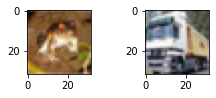

Images with cutout:


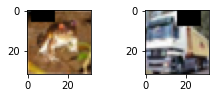

In [26]:
import matplotlib.pyplot as plt
print("Original images:")
for i in range(2):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()
print("Images with cutout:")
for i in range(2):
    plt.subplot(330 + 1 + i)
    plt.imshow(apply_mask(x_train[i]))
plt.show()

# 6. Data Augmentation


Fit - In this part I am going to generate images

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    
    #width_shift_range=[-4,4],
    #height_shift_range=[-4,4],
    #horizontal_flip=0.5, 
    #fill_mode="constant",
    #cval=0,
    #preprocessing_function = apply_mask
    
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    
#     rotation_range=10,  
#     zoom_range = 0.1, 
#     width_shift_range=0.1,  
#     height_shift_range=0.1,
#     shear_range = 0.1,
#     horizontal_flip=True,  
#     vertical_flip=False
    
    )

train_generator = train_datagen.flow(
    x_train,  
    y_train, 
    batch_size=20
) 

Validation and Test - rescale validation and test

In [28]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
    )
validation_generator = validation_datagen.flow(
    x_val, 
    y_val, 
    batch_size=20
)

In [29]:
len(x_train)

40000

# 7. Results Data Generator
In this section, it is possible to see examples of the images that were created before

In [30]:
sample = random.choice(range(0,4998))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train[sample:sample+1],
    batch_size=64
    )

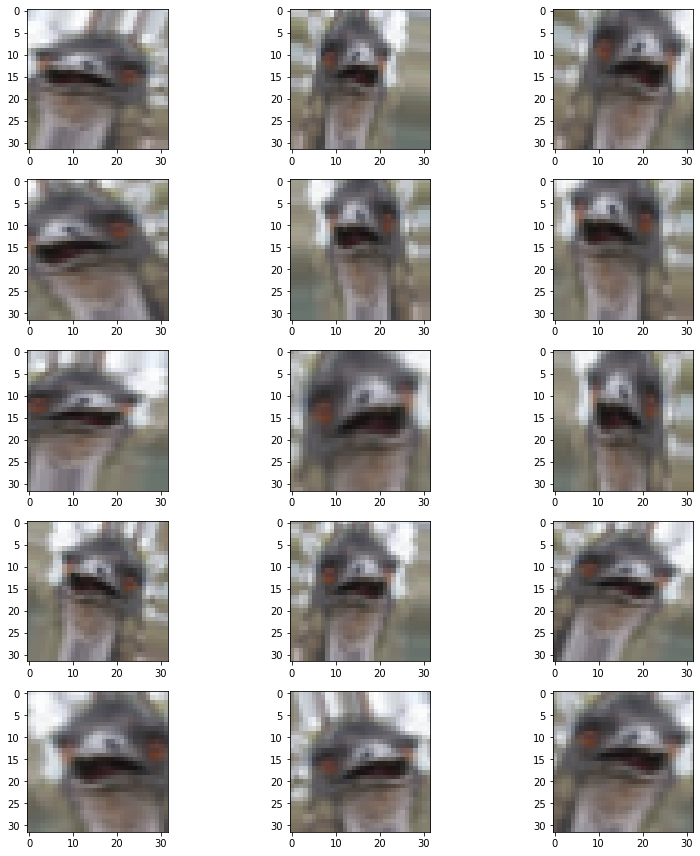

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X, Y in example_generator:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 8. Fit

It is time to start training the model. It is necessary to train against the data converted to the format expected by the Convolution.
I will start with 20 epocs, that is, 20 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 512.

The **.fit ()** method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

In [32]:
t = time.perf_counter()

In [33]:
len(x_train)

40000

In [34]:
x_train.shape[0]

40000

In [35]:
epochs = 200
batch_size=20
batch_size_validation=20
steps = x_train.shape[0]/batch_size
val_steps = x_val.shape[0]/batch_size_validation

history = model.fit(train_generator, epochs=epochs, steps_per_epoch=steps, #number of unique samples of your dataset divided by the batch size
                    validation_data=validation_generator, 
                    validation_steps = val_steps, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    callbacks=[callback_val_loss, callback_val_accuracy])

Epoch 1/200
2000/2000 [==============================] - 357s 170ms/step - loss: 2.9074 - accuracy: 0.1057 - val_loss: 2.2786 - val_accuracy: 0.1225
Epoch 2/200
2000/2000 [==============================] - 338s 169ms/step - loss: 2.3709 - accuracy: 0.1288 - val_loss: 2.2667 - val_accuracy: 0.1636
Epoch 3/200
2000/2000 [==============================] - 339s 170ms/step - loss: 2.1438 - accuracy: 0.1684 - val_loss: 2.0029 - val_accuracy: 0.1730
Epoch 4/200
2000/2000 [==============================] - 338s 169ms/step - loss: 1.7984 - accuracy: 0.2674 - val_loss: 1.2834 - val_accuracy: 0.4773
Epoch 5/200
2000/2000 [==============================] - 338s 169ms/step - loss: 1.4335 - accuracy: 0.4407 - val_loss: 0.8729 - val_accuracy: 0.6881
Epoch 6/200
2000/2000 [==============================] - 339s 169ms/step - loss: 1.1037 - accuracy: 0.6249 - val_loss: 0.5664 - val_accuracy: 0.8085
Epoch 7/200
2000/2000 [==============================] - 339s 169ms/step - loss: 0.8589 - accuracy: 0.7216

In [36]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 4:15:29.595184


# 9. Evaluating Results

Graphic of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [37]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 93.610


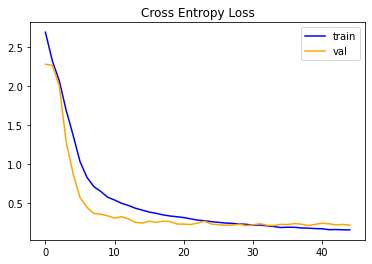

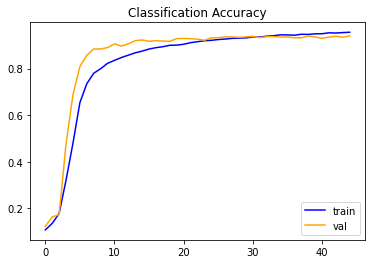

In [38]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [39]:
predictions = model.predict(x_test) #predictions in x_test

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

The first images will be drawn, with the predictions and their real values (a total of 20 images, so as not to abuse your laptops)

Correct predictions will be painted blue and failures red. Even though you printed the labels first so we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


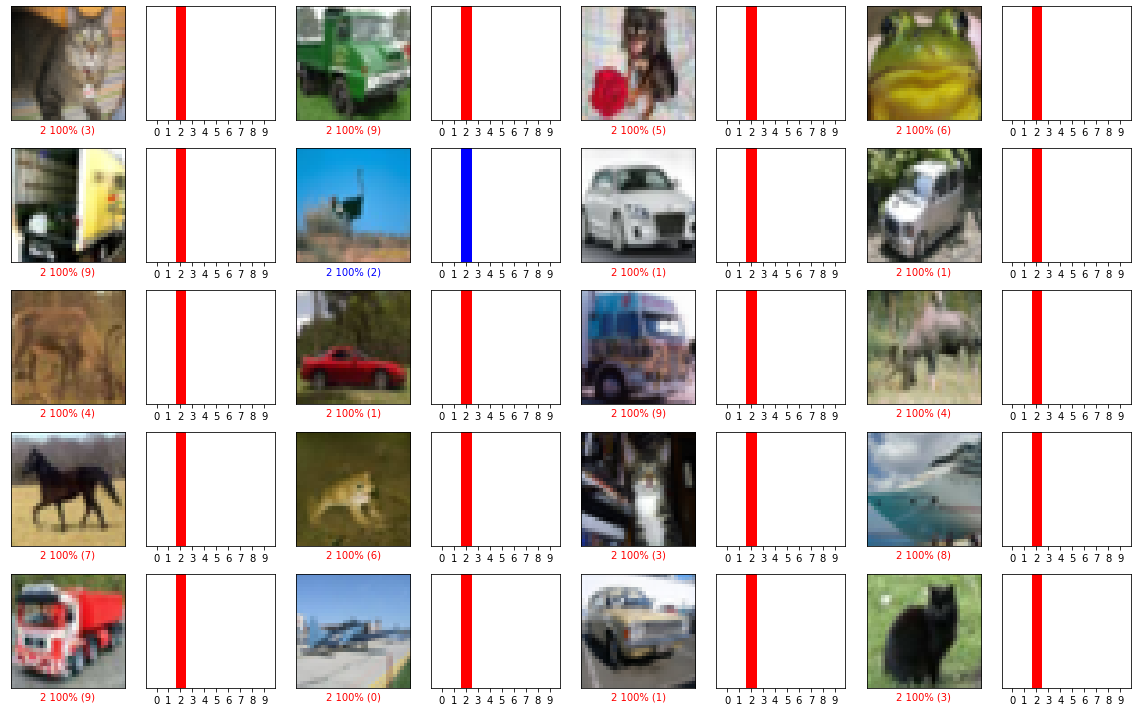

In [41]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

# Confusion Matrix

In [42]:
y_pred_model = model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# 10. Save model 

In [43]:
model.save('cifar10_base_model.h5')